![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

We have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Our task is to apply our data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
# Splitting the string column to numeric columns using dummy variables
penguins_df = pd.get_dummies(penguins_df, dtype='int')

In [3]:
# Scaling the columns before we implement the Machine Learning model
scale = StandardScaler()
X = scale.fit_transform(penguins_df)
peguins_preprocessed = pd.DataFrame(data = X, columns= penguins_df.columns)

In [4]:
peguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


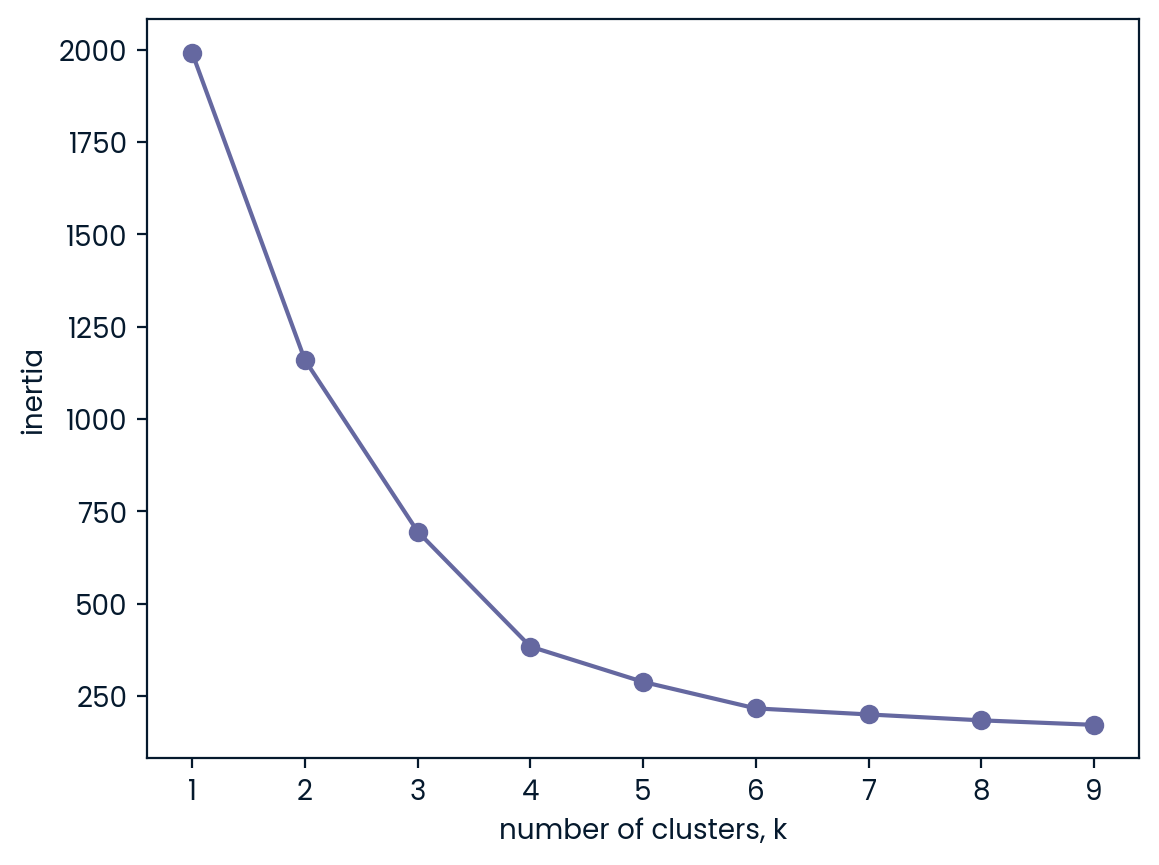

In [5]:
# Before implementing K-Means, we need to determine the number of clusters for this dataset
# We will utilize inertia method linked with the elbow visualization to see the optimal number of clusters
ks = range(1,10) 
inertias = [] 
for k in ks:  
    model = KMeans(n_clusters = k) 
    model.fit(peguins_preprocessed)
    inertias.append(model.inertia_) 

plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show() 

In [6]:
# Implementing the model
kmeans = KMeans(n_clusters=4)
k = kmeans.fit(peguins_preprocessed)
penguins_df['label'] = k.labels_

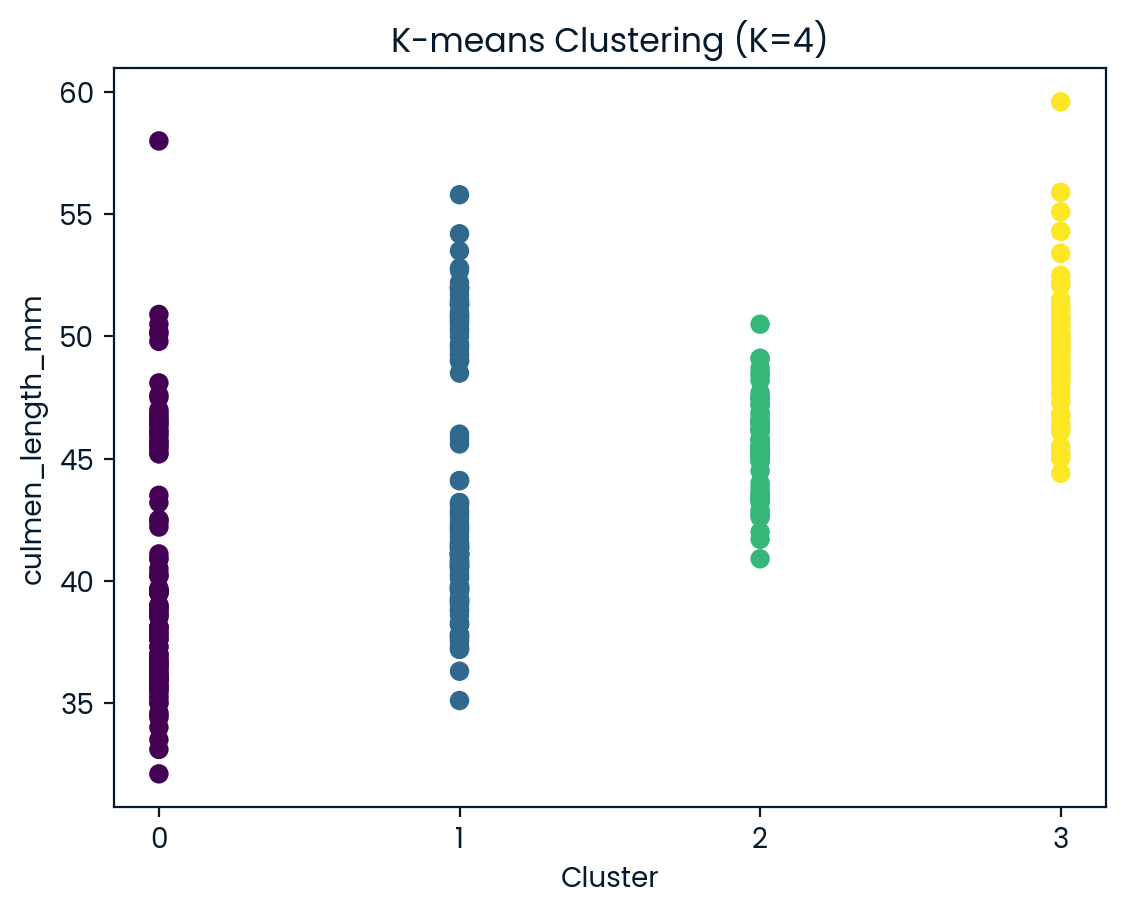

In [7]:
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={4})')
plt.show()

In [8]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,40.217757,17.611215,189.046729
1,43.878302,19.111321,194.764151
2,45.563793,14.237931,212.706897
3,49.473770,15.718033,221.540984
